## Interpolation

Enter the value at which the estimated value be measured: 2
Enter the sheet no: 2
x:  [1. 4. 6. 5.]
f_x: 
 [[ 0.         1.386294   1.791759   1.609438 ]
 [ 0.462098   0.2027325  0.182321   0.       ]
 [-0.0518731 -0.0204115  0.         0.       ]
 [ 0.0078654  0.         0.         0.       ]]
Enter the method: l

The estimated value of [x = 2.0] is:  0.6287674


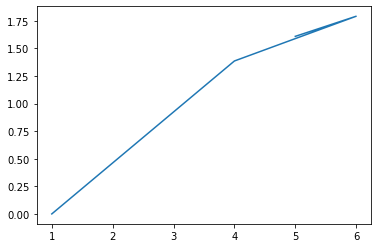

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

x1 = float(input("Enter the value at which the estimated value be measured: "))
a = int(input("Enter the sheet no: "))


####### Storing xlsx data in a matrix #######
wb = openpyxl.load_workbook(r"C:/Users/tanji/Desktop/new.xlsx")
n = wb['Sheet'+str(a)].max_row - 1 # to measure the number of data
x = np.zeros(n)
f_x = np.zeros((n,n))
for i in range(2,n+2):
    x[i-2] = wb['Sheet'+str(a)].cell(i,1).value
    f_x[0,i-2] = wb['Sheet'+str(a)].cell(i,2).value
print("x: ",x)


#################################### Newton's divided difference interpolating polynomials #################################
####### getting finite divided difference ####### 
for i in range(1,n):
    for j in range(0,n-i):
        f_x[i,j] = (f_x[i-1,j+1]-f_x[i-1,j])/(x[i+j]-x[j])
print("f_x: \n",f_x)

####### Putting the values in the final equation of polinomial #######
def newton(z):
    sum = f_x[0,0]
    for i in range(1,n):
        f = f_x[i,0]
        for j in range(0,i):
            f *= (z-x[j])
        sum += f
    return sum

############################################ Lagrange interpolating polynomials ############################################
def lagrange(z):
    sum = 0
    for i in range(0,n):
        p=f_x[0,i]
        for j in range(0,n):
            if i != j:
                p *= (z-x[j])/(x[i]-x[j])
        sum += p
    return sum

##################################################### Output section #######################################################
model = str(input("Enter the method: "))
if model == 'l':
    print("\nThe estimated value of [x = "+str(x1)+"] is: ", result(x1))
    plt.plot(x,lagrange(x))
elif model == 'n':
    print("\nThe estimated value of [x = "+str(x1)+"] is: ", result(x1))
    plt.plot(x,result(x))